In [1]:
from numpy import sqrt   # find lengths of segments
from numpy.linalg import det  # to find areas
from numpy import array
import numpy as np

class Point:
    
    def __init__(self, x, y ):
        self.x = x
        self.y = y
        return
    
    def draw(self):
        pass
    
    def __str__(self):
        return f"({self.x},{self.y})"
    
    # overload the substraction of points
    def __sub__(self, other):
        x=self.x - other.x
        y=self.y - other.y
        return (x, y)
    
    # overload the sum nof points
    def __add__(self, other):
        x=self.x + other.x  # x and y are locals
        y=self.y + other.y
        return Point(x, y)
    
     # overload product by scalar
    def __mul__(self, other):
        x=other*self.x 
        y=other*self.y  
        return Point(x, y)
    
        
p  = Point(1,3)
print(p)
    

(1,3)


In [2]:
import matplotlib.pyplot as plt 
class Segment():
    
    def __init__(self, p1, p2, color="blue"):
        self.p1 = p1
        self.p2 = p2
        self.color = color
        return
    
    
    
    
    def length(self):
        return sqrt( (self.p2.x-self.p1.x)**2 + (self.p2.y-self.p1.y)**2)
    
        
p1 = Point(3,4)  # aggregation
p2 = Point(2,3)
s1 = Segment(p1,p2,"red")

In [3]:
print(s1.p2)

(2,3)


In [4]:
print(s1.color)

red


In [5]:
s1.length()

1.4142135623730951

In [6]:
class Triangle():
    
    def __init__(self, p1, p2, p3, color="blue"):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.color = color
        
        
        
        self.myList = [p1, p2, p3]  # to loop
        
        # create sides in a for loop
        self.segments = []
        n = len(self.myList)
        for i in range(n-1):
            self.segments.append(Segment( self.myList[i], self.myList[i+1]))
        

        # do the last point
        self.segments.append(Segment(self.myList[n-1], self.myList[0]))
    
        return
    
    def perimeter(self):
        n = len(self.myList)
        s = 0
        for i in range(n):
            s += self.segments[i].length()
        return s
    
    def lengthSides(self):
        n = len(self.myList)
        for i in range(n-1):
            print(f"side length between {self.myList[i]} and {self.myList[i+1]}, \
                {self.segments[i].length()}")

        # do the last point
        print(f"side length between {self.myList[n-1]} and {self.myList[0]}, \
               {self.segments[n-1].length()}")
        return
    
    def findCenter(self):
        return (self.p1 + self.p2)   + self.p3  #error dividir por 3
        
    def findArea(self):
        vec1 = self.p3 - self.p1
        vec2 = self.p2 - self.p1

        areaMatrix = array([vec1, vec2])
        # print("matrix\n", areaMatrix)
        # print(det(areaMatrix))
        determ = det(areaMatrix)
        epsilon=1e-15
        if abs(determ) < epsilon:
            print("Warning! the polygon is degenerated")
            
        return 0.5*determ
    

In [7]:
?np.angle

In [8]:
p3 = Point(-1,2)
p2 = Point(4,3)
p1 = Point(5,1)

In [9]:
t1 = Triangle(p1,p2,p3, "green")

In [10]:
print(t1.p1)
print(t1.p2)
print(t1.p3)

(5,1)
(4,3)
(-1,2)


In [11]:
ct = t1.findCenter()
print(ct)

(8,6)


In [12]:
s2 = Segment(t1.p2,t1.p3)
s2.length()

5.0990195135927845

In [13]:
t1.perimeter()

13.417850021390795

In [14]:
t1.lengthSides()

side length between (5,1) and (4,3),                 2.23606797749979
side length between (4,3) and (-1,2),                 5.0990195135927845
side length between (-1,2) and (5,1),                6.082762530298219


In [15]:
t1.findArea()

-5.500000000000001

[WoframAlpha](https://www.wolframalpha.com/input?i=triangle+%28%28-1%2C2%29%2C+%284%2C3%29%2C+%285%2C1%29%29)

In [16]:
class Cuadrilateral():
    
    def __init__(self, p1, p2, p3, p4, color="blue"):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.p4 = p4
        self.color = color
        
        if not isinstance(p1, Point):
            print(f"point {p1} is not an instance of Point")
        
        self.myList = [p1, p2, p3, p4]  # to loop
        , 
        # create sides in a for loop
        self.segments = []
        n = len(self.myList)
        for i in range(n-1):
            self.segments.append(Segment( self.myList[i], self.myList[i+1]))
        

        # do the last point
        self.segments.append(Segment(self.myList[n-1], self.myList[0]))
        return
    
    
    def perimeter(self):
        n = len(self.myList)
        s = 0
        for i in range(n):
            s += self.segments[i].length()
        return s
    
    
    def lengthSides(self):
        n = len(self.myList)
        for i in range(n-1):
            print(f"side length between {self.myList[i]} and {self.myList[i+1]}, {self.segments[i].length()}")

        # do the last point
        print(f"side length between {self.myList[n-1]} and {self.myList[0]}, {self.segments[n-1].length()}")
        return
    

        
    def findArea(self):
        t1 = Triangle(self.p1, self.p2, self.p3)
        t2 = Triangle(self.p1, self.p3, self.p4)
        return abs(t1.findArea() + t2.findArea())
    
    def findCenter(self):
        mySum = (self.p1 + self.p2)   + (self.p3 + self.p4) # mejor en loop
        centerPoint = mySum*0.25
        if not isinstance(centerPoint, Point):
            print(f" center point {centerPoint} is not an instance of Point")
                 
        return centerPoint

    def findAngles(self):
        c = self.findCenter()
        
        n = len(self.myList)
        shiftedPoints=[]
        for i in range(n):
            shiftedPoints.append(self.myList[i]-c)  # centrar los puntos

        print("type of shiftedPoints")
        print(type(shiftedPoints[0]))
        
        # need to convert touple to list
        lsp=list()  # lsp=[]
        for i in range(n):
            lsp.append(complex(list(shiftedPoints[i])[0], list(shiftedPoints[i])[1]))
            # lsp.append(complex(shiftedPoints[i])) no funciona

        
        # print("list length", n) 
        # print("points shifted:")
        #for i in range(n):
        #    print(shiftedPoints[i])
            
       
               
        l=[]
        for i in range(n):
            l.append(np.angle(lsp[i]))
                                  
        return l
            
        
    def sortPoints(self):
        l = self.findAngles()
        temp = sorted(l)    
        res = [temp.index(i) for i in l]
        return res
        
    
    def printPoints(self):
        print("points are:", p1,p2,p3,p4)
        return

In [17]:
c=complex(2,3)
print(c)
t= (1,2)
complex(t)

(2+3j)


TypeError: ignored

In [18]:
p1 = Point(-1,2)
p2 = Point(4,3)
p3 = Point(5,1)
p4 = Point(0,1)
c1 = Cuadrilateral(p1,p2,p3,p4, "red")
print("perimeter=",c1.perimeter())
print(c1.lengthSides())
print("area=",c1.findArea())
c1.printPoints()
pc = c1.findCenter()
print("geometric center is", pc)
print("angles=")
angles = c1.findAngles()
print(angles)
print(c1.sortPoints())



perimeter= 13.74930105346567
side length between (-1,2) and (4,3), 5.0990195135927845
side length between (4,3) and (5,1), 2.23606797749979
side length between (5,1) and (0,1), 5.0
side length between (0,1) and (-1,2), 1.4142135623730951
None
area= 8.0
points are: (-1,2) (4,3) (5,1) (0,1)
geometric center is (2.0,1.75)
angles=
type of shiftedPoints
<class 'tuple'>
[3.058451421701352, 0.5585993153435624, -0.24497866312686414, -2.782821983319221]
type of shiftedPoints
<class 'tuple'>
[3, 2, 1, 0]


In [19]:
class Pentagon:
    
    def __init__(self, p1, p2, p3, p4,p5, color="blue"):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.p4 = p4
        self.p5 = p5
        self.color = color
        
        if not isinstance(p1, Point):
            print(f"point {p1} is not an instance of Point")
        
        self.myList = [p1, p2, p3, p4, p5]  # to loop
        , 
        # create sides in a for loop
        self.segments = []
        n = len(self.myList)
        for i in range(n-1):
            self.segments.append(Segment( self.myList[i], self.myList[i+1]))
        

        # do the last point
        self.segments.append(Segment(self.myList[n-1], self.myList[0]))
        return
    
    
    def perimeter(self):
        n = len(self.myList)
        s = 0
        for i in range(n):
            s += self.segments[i].length()
        return s
    
    
    def lengthSides(self):
        n = len(self.myList)
        for i in range(n-1):
            print(f"side length between {self.myList[i]} and {self.myList[i+1]}, {self.segments[i].length()}")

        # do the last point
        print(f"side length between {self.myList[n-1]} and {self.myList[0]}, {self.segments[n-1].length()}")
        return
    

        
    def findArea(self):
        t1 = Triangle(self.p1, self.p2, self.p3)  # esto debe ser un ciclo
        t2 = Triangle(self.p1, self.p3, self.p4)
        t3 = Triangle(self.p1, self.p4, self.p5)
        return abs(t1.findArea() + t2.findArea() + t3.findArea())
    
    def findCenter(self):
        mySum = (self.p1 + self.p2)   + (self.p3 + self.p4)
        mySum = mySum + self.p5
        centerPoint = mySum*0.2
        if not isinstance(centerPoint, Point):
            print(f" center point {centerPoint} is not an instance of Point")
                 
        return centerPoint

    def findAngles(self):
        c = self.findCenter()
        
        n = len(self.myList)
        shiftedPoints=[]
        for i in range(n):
            shiftedPoints.append(self.myList[i]-c)
            
       
        print("type of shiftedPoints")
        print(type(shiftedPoints[0]))
        
        # need to convert touple to list
        lsp=list()
        for i in range(n):
            lsp.append(complex(list(shiftedPoints[i])[0], list(shiftedPoints[i])[1]))
            
        
        # print("list length", n) 
        # print("points shifted:")
        #for i in range(n):
         #   print(shiftedPoints[i])
            
       
               
        l=[]
        for i in range(n):
            l.append(np.angle(lsp[i]))
                                  
        return l
            
        
    def sortPoints(self):
        l = self.findAngles()
        temp = sorted(l)    
        res = [temp.index(i) for i in l]
        return res
        
    
    def printPoints(self):
        print("points are:", p1,p2,p3,p4)
        return

In [20]:
L=[1,5,3]
temp=sorted(L)
print(temp)
res=[temp.index(i) for i in L]
print(res)

[1, 3, 5]
[0, 2, 1]


In [21]:
class Polygon():
    
    # receives a list of points
    def __init__(self , points, color, mesh=False, fill=False):
        self.points = points
        self.color = color
        self.mesh = mesh  # true or false to draw mesh
        self.fill = fill
        
        # create sides in a for loop
        self.segments = []
        n = len(self.points)
        for i in range(n-1):
            self.segments.append(Segment( self.points[i], self.points[i+1]))
            
        # last segment
        self.segments.append(Segment( self.points[n-1], self.points[0]))
        

        
    def printPoints(self):
        print("The points for the polygon are:")
        for p in self.points:
            print(f" {p}",end=',')
        return "   end"
    
    
    
    
    def lengthSides(self):
        n = len(self.points)
        print("number of points", n)
        for i in range(n-1):
            print(f"side length between {self.points[i]} and {self.points[i+1]}, {self.segments[i].length()}")

        # do the last point
        print(f"side length between {self.points[n-1]} and {self.points[0]}, {self.segments[n-1].length()}")
        return
    
    def perimeter(self):
        n = len(self.points)
        s = 0
        for i in range(n):
            s += self.segments[i].length()
        return s
    
    def findArea(self):
        n = len(self.points)
        s=0
        for i in range(1,n-1):
            t = Triangle(self.points[0], self.points[i], self.points[i+1])
            s +=  t.findArea()
        return abs(s)
    
    
    
    def findCenter(self):
        n = len(self.points)
        mySum=Point(0,0)
        for point in self.points:
            mySum = point + mySum
            
        
        centerPoint = mySum*(1/n)
        if not isinstance(centerPoint, Point):
            print(f" center point {centerPoint} is not an instance of Point")
                 
        return centerPoint
    
    
    def findAngles(self):
        c = self.findCenter()
        
        n = len(self.points)
        shiftedPoints=[]
        for i in range(n):
            shiftedPoints.append(self.points[i]-c)
            
       
        print("type of shiftedPoints")
        print(type(shiftedPoints[0]))
        
        # need to convert tuple to list
        lsp=list()
        for i in range(n):
            lsp.append(complex(list(shiftedPoints[i])[0], list(shiftedPoints[i])[1]))
            
        
        # print("list length", n) 
        # print("points shifted:")
        #for i in range(n):
        #   print(shiftedPoints[i])
            
       
               
        l=[]
        for i in range(n):
            l.append(np.angle(lsp[i]))
                                  
        return l
    
    def sortPoints(self):
        l = self.findAngles()
        temp = sorted(l)    
        res = [l.index(point) for point in temp]
        print("angles before sorting")
        print("l=",l)
        print("angles after sorting")
        print("temp=",temp)
        return res
            
    
    def draw(self, mesh):  #mesh is True or False to draw mesh
        
        plt.rcParams["figure.figsize"] = (5,5)  # Figure size
        plt.rcParams.update({'font.size': 10})  # font size


        
        # design title:
        str=""
        for p in self.points:
            str += f" {p}"
        title = f"Polygon for points {str}"
        plt.title(title)

        x=[]
        y=[]
        for p in self.points:
            x.append(p.x)
            y.append(p.y)

        # join the last with the first
        x.append(x[0])
        y.append(y[0])

        plt.plot(x,y, color=self.color)  # une los puntos
        plt.scatter(x, y, s=80, facecolors='none', edgecolors='k')  #bolitas
        
        if self.fill:
            plt.fill(x,y)
        
        # draw text
        i=0
        for p in self.points:
            i = i+1
            plt.text(p.x, p.y, "  point # %d is (%s,%s)"%(i,p.x,p.y))
        
        # draw mesh
        if self.mesh:
            center = self.findCenter()
        
            plt.scatter(center.x, center.y, color="r")
            plt.text(center.x, center.y, "  center point is (%2.1f, %2.1f)"%(center.x,center.y))

            for  p in self.points:
                plt.plot( [center.x, p.x], [center.y, p.y], color='r')

    plt.show()

        
    def definePolygon(self):
        # to know what kind of polygon it should count points
        if len(self.points)==2:
            s = Segment(self.points[0], self.points[1])
            print(f"The polygon is a {self.color} segment")
            print(f"The lenth of the segment is {s.length()}")
                   
        elif len(self.points)==3:
            t = Triangle(self.points[0], self.points[1], self.points[2])
            print(f"The polygon is a {self.color} triangle")
            print(f"The length sides are:")
            t.lengthSides()
            print(f"The area of the triangle is")
            print("   ",t.findArea())
        elif len(self.points)==4: # lab
            c = Cuadrilateral(self.points[0], self.points[1], self.points[2], self.points[3])
            print(f"The polygon is a {self.color} cuadrilateral")
            print(f"The length sides are:")
            c.lengthSides()
            print(f"The area of the cuadrilateral is")
            print("   ",c.findArea())
            print("order of points", list(c.sortPoints()))
            # print(list(c.sortPoints()))
        elif len(self.points)==5:  # lab
            pen = Pentagon(self.points[0], self.points[1], self.points[2], self.points[3], self.points[4])
            print(f"The polygon is a {self.color} pentagon")
            print(f"The length sides are:")
            pen.lengthSides()
            print(f"The area of the cuadrilateral is")
            print("   ",pen.findArea())
            print("order of points", list(pen.sortPoints()))
            # print(list(c.sortPoints()))
        else:
            print("figure has more than 5 points. No name provided")
            print(f"The length sides are:")
            self.lengthSides()
            print(f"The area of the polygon is")
            print("   ",self.findArea())
            print("order of points", list(self.sortPoints()))
            
        print(self.printPoints())
        print("Here is the figure of the polygon")
        self.draw(self.mesh)
        return        

In [22]:
p1 = Point(-1,2)
p2 = Point(4,3)
p3 = Point(5,1)

l=[p1,p2,p3]
pol = Polygon(l, "blue", True, True)

The polygon is a blue triangle
The length sides are:
side length between (-1,2) and (4,3),                 5.0990195135927845
side length between (4,3) and (5,1),                 2.23606797749979
side length between (5,1) and (-1,2),                6.082762530298219
The area of the triangle is
    5.500000000000001
The points for the polygon are:
 (-1,2), (4,3), (5,1),   end
Here is the figure of the polygon


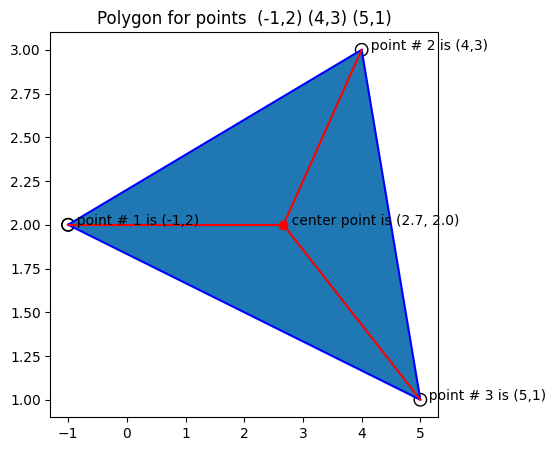

In [23]:
# %matplotlib qt
%matplotlib inline
pol.definePolygon()

The polygon is a green cuadrilateral
The length sides are:
side length between (-1,2) and (4,3), 5.0990195135927845
side length between (4,3) and (5,1), 2.23606797749979
side length between (5,1) and (0,1), 5.0
side length between (0,1) and (-1,2), 1.4142135623730951
The area of the cuadrilateral is
    8.0
type of shiftedPoints
<class 'tuple'>
order of points [3, 2, 1, 0]
The points for the polygon are:
 (-1,2), (4,3), (5,1), (0,1),   end
Here is the figure of the polygon


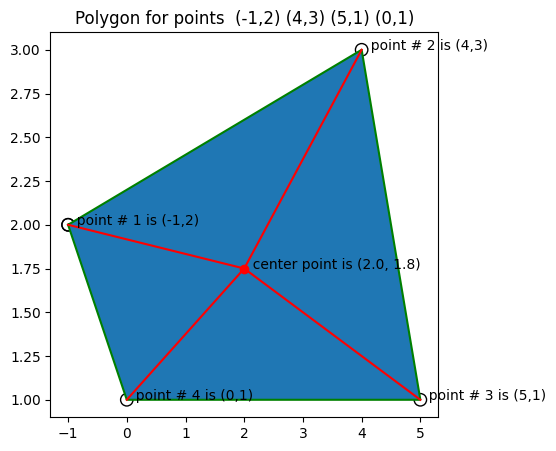

In [24]:
p1 = Point(-1,2)
p2 = Point(4,3)
p3 = Point(5,1)
p4 = Point(0,1)
l=[p1,p2,p3,p4]
pol=Polygon(l, "green", True, True)
pol.definePolygon()

The polygon is a red cuadrilateral
The length sides are:
side length between (-1,2) and (5,1), 6.082762530298219
side length between (5,1) and (4,3), 2.23606797749979
side length between (4,3) and (0,1), 4.47213595499958
side length between (0,1) and (-1,2), 1.4142135623730951
The area of the cuadrilateral is
    2.500000000000001
type of shiftedPoints
<class 'tuple'>
order of points [3, 1, 2, 0]
The points for the polygon are:
 (-1,2), (5,1), (4,3), (0,1),   end
Here is the figure of the polygon


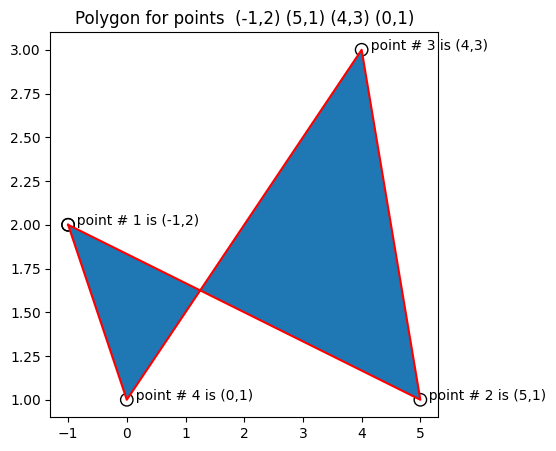

In [25]:
# permute points 2 and 3
p1 = Point(-1,2)
p3 = Point(4,3)
p2 = Point(5,1)
p4 = Point(0,1)
l=[p1,p2,p3,p4]
pol=Polygon(l, "red", False, True)
pol.definePolygon()


In [26]:
cp = pol.findCenter()
print(cp)
angles = pol.findAngles()
print(angles)

(2.0,1.75)
type of shiftedPoints
<class 'tuple'>
[3.058451421701352, -0.24497866312686414, 0.5585993153435624, -2.782821983319221]


In [27]:
# create a list in the correct order
listOrder = pol.sortPoints()
n=len(l)

l2=list()
for i in range(n):
    l2.append(l[listOrder[i]])
              
newPolygon = Polygon(l2, "green", True, True)

type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [3.058451421701352, -0.24497866312686414, 0.5585993153435624, -2.782821983319221]
angles after sorting
temp= [-2.782821983319221, -0.24497866312686414, 0.5585993153435624, 3.058451421701352]


The polygon is a green cuadrilateral
The length sides are:
side length between (0,1) and (5,1), 5.0
side length between (5,1) and (4,3), 2.23606797749979
side length between (4,3) and (-1,2), 5.0990195135927845
side length between (-1,2) and (0,1), 1.4142135623730951
The area of the cuadrilateral is
    7.999999999999999
type of shiftedPoints
<class 'tuple'>
order of points [0, 1, 2, 3]
The points for the polygon are:
 (0,1), (5,1), (4,3), (-1,2),   end
Here is the figure of the polygon


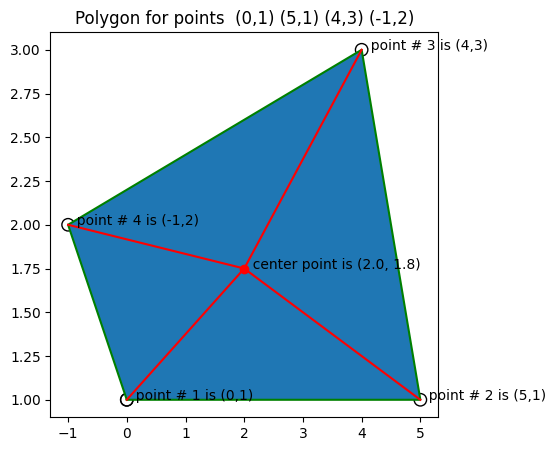

In [28]:
newPolygon.definePolygon()

[wolframAlpha](https://www.wolframalpha.com/input?i=quadrilateral+%280%2C1%29%2C+%285%2C1%29%2C+%284%2C3%29%2C+%28-1%2C2%29)

In [29]:
newPolygon.findAngles()

type of shiftedPoints
<class 'tuple'>


[-2.782821983319221,
 -0.24497866312686414,
 0.5585993153435624,
 3.058451421701352]

In [30]:
newPolygon.sortPoints()

type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [-2.782821983319221, -0.24497866312686414, 0.5585993153435624, 3.058451421701352]
angles after sorting
temp= [-2.782821983319221, -0.24497866312686414, 0.5585993153435624, 3.058451421701352]


[0, 1, 2, 3]

The polygon is a red pentagon
The length sides are:
side length between (0,1) and (4,13), 12.649110640673518
side length between (4,13) and (5,1), 12.041594578792296
side length between (5,1) and (-10,2), 15.033296378372908
side length between (-10,2) and (2,2), 12.0
side length between (2,2) and (0,1), 2.23606797749979
The area of the cuadrilateral is
    33.49999999999999
type of shiftedPoints
<class 'tuple'>
order of points [1, 4, 3, 0, 2]
The points for the polygon are:
 (0,1), (4,13), (5,1), (-10,2), (2,2),   end
Here is the figure of the polygon


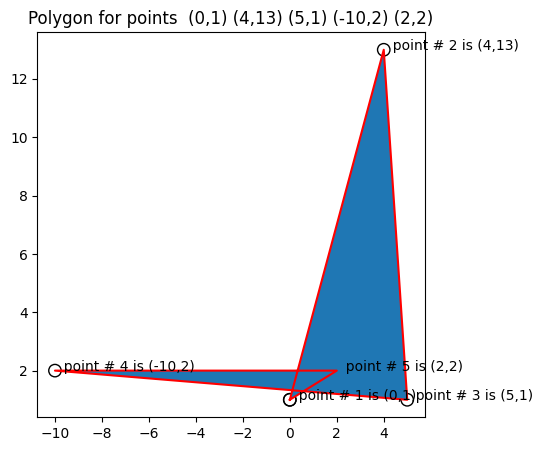

In [31]:
p4 = Point(-10,2)
p2 = Point(4,13)
p3 = Point(5,1)
p1 = Point(0,1)
p5 = Point(2,2)
l=[p1,p2,p3,p4,p5]
pol=Polygon(l, "red", False, True)
pol.definePolygon()

In [33]:
# create a list in the correct order
listOrder = pol.sortPoints()
n=len(l)

l2=list()
for i in range(n):
    l2.append(l[listOrder[i]])
              
newPolygon = Polygon(l2, "green", True, True)

type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [-1.642103791580187, 1.1790963873574725, -0.5280744484263598, -2.9669204545815533, -0.7853981633974484]
angles after sorting
temp= [-2.9669204545815533, -1.642103791580187, -0.7853981633974484, -0.5280744484263598, 1.1790963873574725]


The polygon is a green pentagon
The length sides are:
side length between (-10,2) and (0,1), 10.04987562112089
side length between (0,1) and (2,2), 2.23606797749979
side length between (2,2) and (5,1), 3.1622776601683795
side length between (5,1) and (4,13), 12.041594578792296
side length between (4,13) and (-10,2), 17.804493814764857
The area of the cuadrilateral is
    89.5
type of shiftedPoints
<class 'tuple'>
order of points [0, 1, 2, 3, 4]
The points for the polygon are:
 (-10,2), (0,1), (2,2), (5,1), (4,13),   end
Here is the figure of the polygon


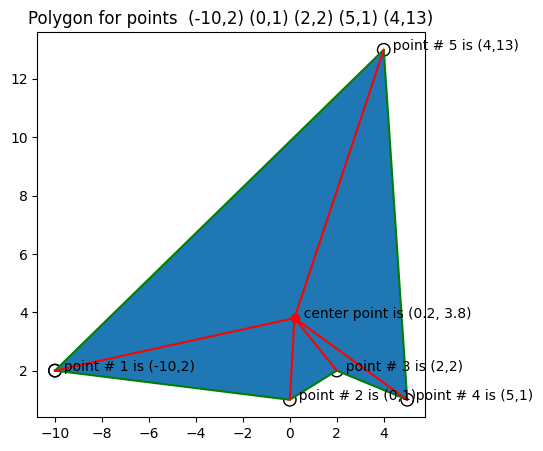

In [34]:
newPolygon.definePolygon()

In [ ]:
newPolygon.findAngles()  

In [ ]:
newPolygon.sortPoints()

[WolframAlpha](https://www.wolframalpha.com/input?i=pentagon+%28-10%2C2%29%2C+%280%2C1%29%2C+%282%2C2%29%2C+%285%2C1%29%2C+%284%2C13%29)

figure has more than 5 points. No name provided
The length sides are:
number of points 7
side length between (0,1) and (2,1.5), 2.0615528128088303
side length between (2,1.5) and (5,1), 3.0413812651491097
side length between (5,1) and (6,2.8), 2.0591260281974
side length between (6,2.8) and (4,3), 2.009975124224178
side length between (4,3) and (2,2), 2.23606797749979
side length between (2,2) and (-1,2), 3.0
side length between (-1,2) and (0,1), 1.4142135623730951
The area of the polygon is
Warning! the polygon is degenerated
    7.1499999999999995
type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [-2.804917834203066, -2.5308666892005847, -0.3548972228898228, 0.25670833043338565, 0.6561787179913948, 2.968346987137428, 3.1135999674829793]
angles after sorting
temp= [-2.804917834203066, -2.5308666892005847, -0.3548972228898228, 0.25670833043338565, 0.6561787179913948, 2.968346987137428, 3.1135999674829793]
order of points [0, 1, 2, 3, 4, 5, 6]
The points for the polygon are

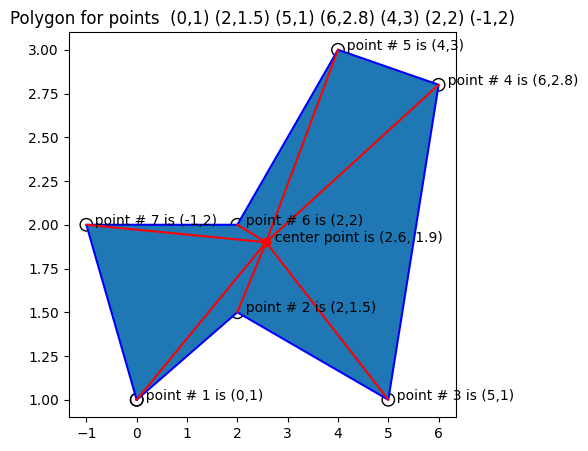

In [35]:
# heptagon
p1 = Point(0,1)
p2 = Point(2, 1.5)
p3 = Point(5,1)
p4 = Point(6,2.8)
p5 = Point(4,3)
p6 = Point(2,2)
p7 = Point(-1, 2)
l = [p1, p2, p3, p4, p5, p6, p7]
pol=Polygon(l, "blue", True, True)
pol.definePolygon()


figure has more than 5 points. No name provided
The length sides are:
number of points 7
side length between (6,2.8) and (2,1.5), 4.2059481689626175
side length between (2,1.5) and (-1,2), 3.0413812651491097
side length between (-1,2) and (0,1), 1.4142135623730951
side length between (0,1) and (4,3), 4.47213595499958
side length between (4,3) and (2,2), 2.23606797749979
side length between (2,2) and (5,1), 3.1622776601683795
side length between (5,1) and (6,2.8), 2.0591260281974
The area of the polygon is
    2.9499999999999997
type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [0.25670833043338565, -2.5308666892005847, 3.1135999674829793, -2.804917834203066, 0.6561787179913948, 2.968346987137428, -0.3548972228898228]
angles after sorting
temp= [-2.804917834203066, -2.5308666892005847, -0.3548972228898228, 0.25670833043338565, 0.6561787179913948, 2.968346987137428, 3.1135999674829793]
order of points [3, 1, 6, 0, 4, 5, 2]
The points for the polygon are:
 (6,2.8), (2,1.5), (

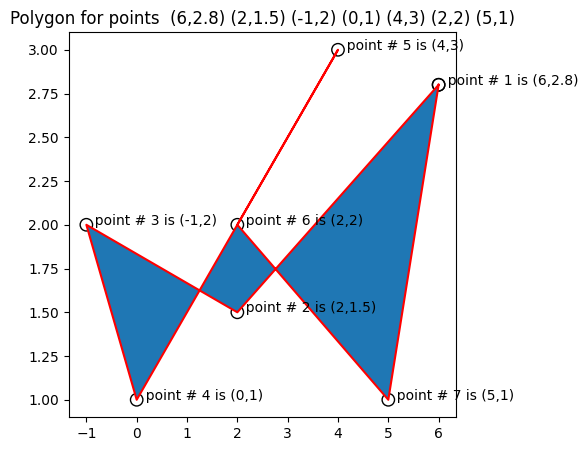

In [36]:
# heptagon
p4 = Point(0,1)
p2 = Point(2, 1.5)
p7 = Point(5,1)
p1 = Point(6,2.8)
p5 = Point(4,3)
p6 = Point(2,2)
p3 = Point(-1, 2)
l = [p1, p2, p3, p4, p5, p6, p7]
pol=Polygon(l, "red", False, True)
pol.definePolygon()


In [37]:
# create a list in the correct order
listOrder = pol.sortPoints()
n=len(l)

l2=list()
for i in range(n):
    l2.append(l[listOrder[i]])
              
newPolygon = Polygon(l2, "green", True, True)

type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [0.25670833043338565, -2.5308666892005847, 3.1135999674829793, -2.804917834203066, 0.6561787179913948, 2.968346987137428, -0.3548972228898228]
angles after sorting
temp= [-2.804917834203066, -2.5308666892005847, -0.3548972228898228, 0.25670833043338565, 0.6561787179913948, 2.968346987137428, 3.1135999674829793]


figure has more than 5 points. No name provided
The length sides are:
number of points 7
side length between (0,1) and (2,1.5), 2.0615528128088303
side length between (2,1.5) and (5,1), 3.0413812651491097
side length between (5,1) and (6,2.8), 2.0591260281974
side length between (6,2.8) and (4,3), 2.009975124224178
side length between (4,3) and (2,2), 2.23606797749979
side length between (2,2) and (-1,2), 3.0
side length between (-1,2) and (0,1), 1.4142135623730951
The area of the polygon is
Warning! the polygon is degenerated
    7.1499999999999995
type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [-2.804917834203066, -2.5308666892005847, -0.3548972228898228, 0.25670833043338565, 0.6561787179913948, 2.968346987137428, 3.1135999674829793]
angles after sorting
temp= [-2.804917834203066, -2.5308666892005847, -0.3548972228898228, 0.25670833043338565, 0.6561787179913948, 2.968346987137428, 3.1135999674829793]
order of points [0, 1, 2, 3, 4, 5, 6]
The points for the polygon are

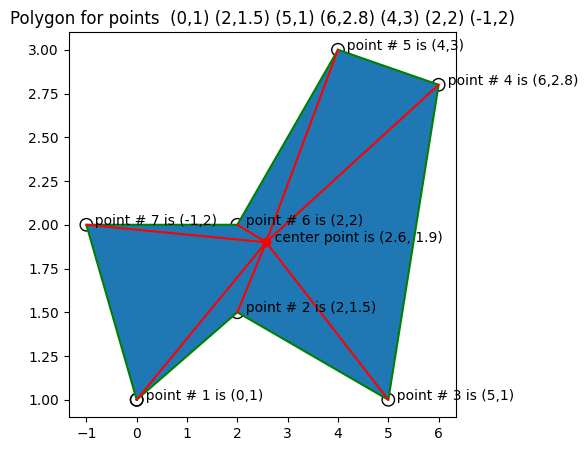

In [38]:
newPolygon.definePolygon()

[Wolfram Alpha](https://www.wolframalpha.com/input?i=heptagon+%280%2C1%29%2C+%282%2C+1.5%29%2C+%285%2C1%29%2C+%286%2C+2.8%29%2C+%284%2C3%29%2C+%282%2C2%29%2C+%28-1%2C2%29)

figure has more than 5 points. No name provided
The length sides are:
number of points 6
side length between (0,1) and (4,13), 12.649110640673518
side length between (4,13) and (5,1), 12.041594578792296
side length between (5,1) and (-10,2), 15.033296378372908
side length between (-10,2) and (2,2), 12.0
side length between (2,2) and (-1,4), 3.605551275463989
side length between (-1,4) and (0,1), 3.1622776601683795
The area of the polygon is
    29.999999999999993
type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [-1.5707963267948966, 1.1593400833811944, -0.515549007458979, -2.960272879188303, -0.7419472680059174, 2.976443976175166]
angles after sorting
temp= [-2.960272879188303, -1.5707963267948966, -0.7419472680059174, -0.515549007458979, 1.1593400833811944, 2.976443976175166]
order of points [3, 0, 4, 2, 1, 5]
The points for the polygon are:
 (0,1), (4,13), (5,1), (-10,2), (2,2), (-1,4),   end
Here is the figure of the polygon


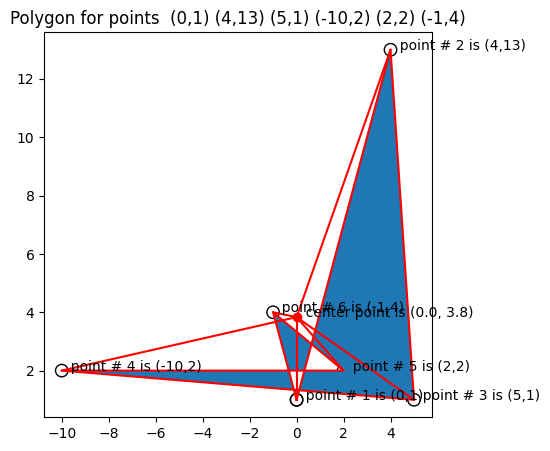

In [39]:
p4 = Point(-10,2)
p2 = Point(4,13)
p3 = Point(5,1)
p1 = Point(0,1)
p5 = Point(2,2)
p6 = Point(-1,4)
l=[p1,p2,p3,p4,p5, p6]
pol=Polygon(l, "red", True, True)
pol.definePolygon()

In [40]:
# create a list in the correct order
listOrder = pol.sortPoints()
n=len(l)

l2=list()
for i in range(n):
    l2.append(l[listOrder[i]])
              
newPolygon = Polygon(l2, "green", True, True)

type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [-1.5707963267948966, 1.1593400833811944, -0.515549007458979, -2.960272879188303, -0.7419472680059174, 2.976443976175166]
angles after sorting
temp= [-2.960272879188303, -1.5707963267948966, -0.7419472680059174, -0.515549007458979, 1.1593400833811944, 2.976443976175166]


figure has more than 5 points. No name provided
The length sides are:
number of points 6
side length between (-10,2) and (0,1), 10.04987562112089
side length between (0,1) and (2,2), 2.23606797749979
side length between (2,2) and (5,1), 3.1622776601683795
side length between (5,1) and (4,13), 12.041594578792296
side length between (4,13) and (-1,4), 10.295630140987
side length between (-1,4) and (-10,2), 9.219544457292887
The area of the polygon is
    54.0
type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [-2.960272879188303, -1.5707963267948966, -0.7419472680059174, -0.515549007458979, 1.1593400833811944, 2.976443976175166]
angles after sorting
temp= [-2.960272879188303, -1.5707963267948966, -0.7419472680059174, -0.515549007458979, 1.1593400833811944, 2.976443976175166]
order of points [0, 1, 2, 3, 4, 5]
The points for the polygon are:
 (-10,2), (0,1), (2,2), (5,1), (4,13), (-1,4),   end
Here is the figure of the polygon


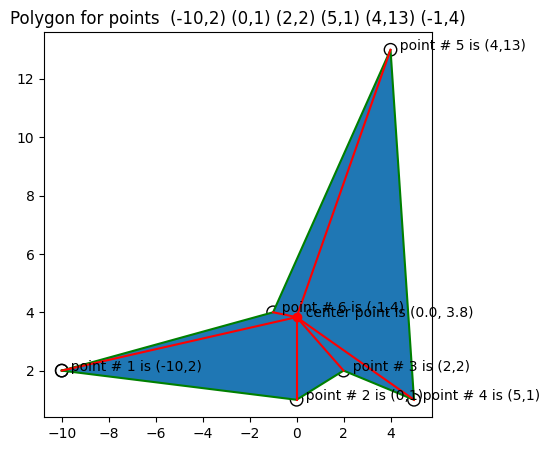

In [41]:
newPolygon.definePolygon()

The polygon is a red triangle
The length sides are:
side length between (1,1) and (2,2),                 1.4142135623730951
side length between (2,2) and (4,4),                 2.8284271247461903
side length between (4,4) and (1,1),                4.242640687119285
The area of the triangle is
Warning! the polygon is degenerated
    0.0
The points for the polygon are:
 (1,1), (2,2), (4,4),   end
Here is the figure of the polygon


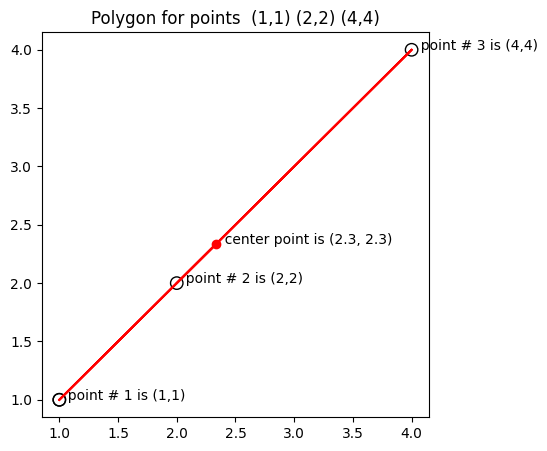

In [42]:
p1 = Point(1,1)
p2 = Point(2,2)
p3 = Point(4,4)

l=[p1,p2,p3]
pol=Polygon(l, "red", True)
pol.definePolygon()


The polygon is a red cuadrilateral
The length sides are:
side length between (-1,1) and (3,-10), 11.704699910719626
side length between (3,-10) and (0,0), 10.44030650891055
side length between (0,0) and (1,1), 1.4142135623730951
side length between (1,1) and (-1,1), 2.0
The area of the cuadrilateral is
    4.5
type of shiftedPoints
<class 'tuple'>
order of points [3, 0, 2, 1]
The points for the polygon are:
 (-1,1), (3,-10), (0,0), (1,1),   end
Here is the figure of the polygon


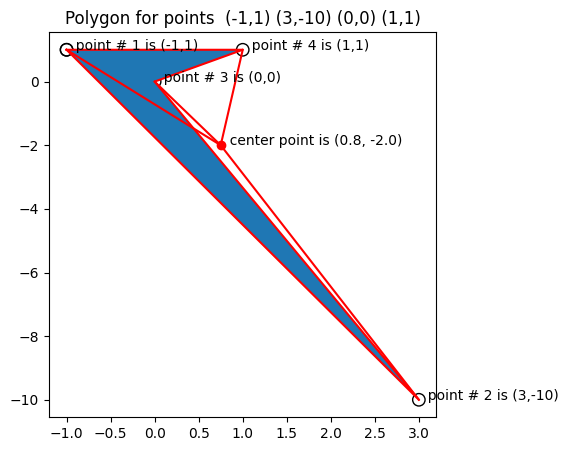

In [43]:
p1 = Point(-1,1)
p3 = Point(0,0)
p2 = Point(3,-10)
p4 = Point(1,1)

l=[p1,p2,p3,p4]
pol=Polygon(l, "red", True, True)
pol.definePolygon()

The polygon is a red cuadrilateral
The length sides are:
side length between (-1,1) and (0,0), 1.4142135623730951
side length between (0,0) and (3,-10), 10.44030650891055
side length between (3,-10) and (1,1), 11.180339887498949
side length between (1,1) and (-1,1), 2.0
The area of the cuadrilateral is
    7.500000000000002
type of shiftedPoints
<class 'tuple'>
order of points [3, 2, 0, 1]
The points for the polygon are:
 (-1,1), (0,0), (3,-10), (1,1),   end
Here is the figure of the polygon


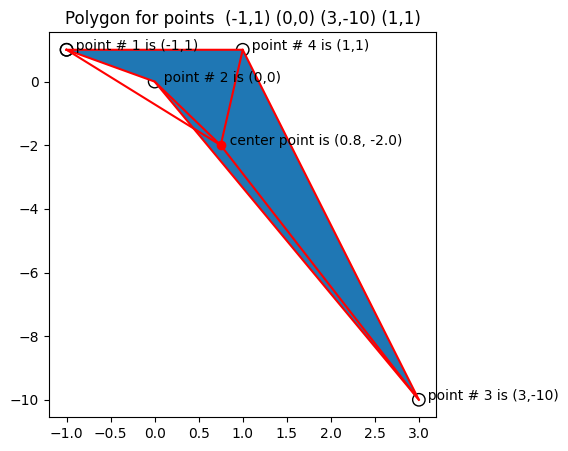

In [44]:
p1 = Point(-1,1)
p2 = Point(0,0)
p3 = Point(3,-10)
p4 = Point(1,1)

l=[p1,p2,p3,p4]
pol=Polygon(l, "red", True, True)
pol.definePolygon()

In [45]:
# create a list in the correct order
listOrder = pol.sortPoints()
n=len(l)

l2=list()
for i in range(n):
    l2.append(l[listOrder[i]])
              
newPolygon = Polygon(l2, "green", True, True)

type of shiftedPoints
<class 'tuple'>
angles before sorting
l= [2.0988707752212563, 1.9295669970654687, -1.2966288756752378, 1.4876550949064553]
angles after sorting
temp= [-1.2966288756752378, 1.4876550949064553, 1.9295669970654687, 2.0988707752212563]


The polygon is a green cuadrilateral
The length sides are:
side length between (3,-10) and (1,1), 11.180339887498949
side length between (1,1) and (0,0), 1.4142135623730951
side length between (0,0) and (-1,1), 1.4142135623730951
side length between (-1,1) and (3,-10), 11.704699910719626
The area of the cuadrilateral is
    10.000000000000002
type of shiftedPoints
<class 'tuple'>
order of points [0, 1, 2, 3]
The points for the polygon are:
 (3,-10), (1,1), (0,0), (-1,1),   end
Here is the figure of the polygon


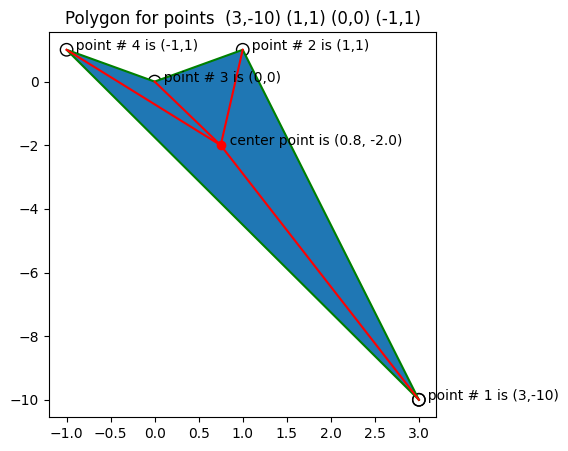

In [46]:
newPolygon.definePolygon()